In [4]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import statistics 
import os
import warnings
import nltk
import string
import collections
import matplotlib.cm as cm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from collections import Counter
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import re
from textblob import TextBlob,Word,Blobber
import csv

nltk.download('stopwords')
warnings.filterwarnings('ignore')
filepath = os.path.join(os.getcwd(),'CSV_Files','ninja_reports.xls')

df = pd.read_excel('ninja_reports2.xls',sheet_name='ninja_reports')

df_w = pd.read_csv("ward_details.csv")
#df = df.drop(columns = ['jg_sub_category','title_id','web_url','civic_agency_title','civic_agency_number','user_status','createdInJanagraha'])

[nltk_data] Downloading package stopwords to C:\Users\Adithi
[nltk_data]     Satish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def isint(n):
    try:
        int(n)
        return n
    except:
        return -1;

def ward():
    l = list(df.ward_id.unique())
    len(l)
    ward_count = 0
    for i in df.ward_id:
        if(i<=198):
            ward_count+=1
    print("Noise: ",ward_count)
    
#cleaning df.location and alloting city/state IDs 

city_number = []
i = 0
for city in df.location:
    #print(str(city))
    if "chennai" in str(df.location[i]).lower():
        city_number.insert(i, 2)
    elif "Tamil Nadu" in str(df.location[i]):
        city_number.insert(i, 2)
    elif "Andhra Pradesh" in str(df.location[i]):
        city_number.insert(i, 4)
    elif "hosur" in str(df.location[i]).lower():
        city_number.insert(i,3)
    elif "bangalore" in str(df.location[i]).lower():
        city_number.insert(i,1)
    elif "bengaluru" in str(df.location[i]).lower():
        city_number.insert(i,1)
    elif "560023" in str(df.location[i]).lower():
        city_number.insert(i,1)
    elif "uttarahalli" in str(df.location[i]).lower():
        city_number.insert(i,1)
    else:
        city_number.insert(i,0)
    i += 1
    
#print(len(city_number))
df['city_number'] = city_number

k = 0
for i in df.location:
        if "chikkajala" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "nagegowdanapalya" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "562157" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "562129" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "Behind government automobile workshop bangalore" in str(df.landmark[k]):
            df.city_number[k] = 0
        if "562125" in str(df.location[k]).lower() or "562123" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "562149" in str(df.location[k]).lower() or "madanayakahalli" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "562149" in str(df.location[k]).lower() or "thammenahalli" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "poppat jamals" in str(df.landmark[k]).lower() or "mandaveli" in str(df.landmark[k]).lower() or "perundurai" in str(df.landmark[k]).lower():
            df.city_number[k] = 2
        k += 1


k = 0
count = 0
for n in df.city_number:
    if n == 1:
        #print(df.location[k])
        count += 1
    k += 1
#print(count)

In [6]:
#ward cleaning done only for Bangalore data

k = 0
count = 0
count2 = 0
for i in df.city_number:
    if i == 1:
        if "gandhi bazaar" in str(df.location[k]).lower():
            df.ward_id[k] = 142
        if "2nd Phase, J. P. Nagar" in str(df.location[k]): 
            df.ward_id[k] = 177
        if "1st Phase, J. P. Nagar" in str(df.location[k]): 
            df.ward_id[k] = 177
        if "4th ‘T’ Block,Jayanagar" in str(df.location[k]):
            df.ward_id[k] = 168
        if "4th T Block East" in str(df.location[k]):
            df.ward_id[k] = 168
        if "Hullahalli" in str(df.location[k]):
            df.ward_id[k] = 192
        if "4th Block, Jayanagar" in str(df.location[k]):
            df.ward_id[k] = 168
        if "560004" in str(df.location[k]):
            df.ward_id[k] = 142
        if "Subramanyapura" in str(df.location[k]):
            df.ward_id[k] = 184
        if "BTM Layout" in str(df.location[k]):
            #print(df.location[k], df.ward_id[k])
            df.ward_id[k] = 188
        if "Shanthala Nagar" in str(df.location[k]):
            df.ward_id[k] = 111
        if "High Grounds" in str(df.location[k]):
            df.ward_id[k] = 93
        if "560062" in str(df.location[k]):
            df.ward_id[k] = 196
        if "Electronic City" in str(df.location[k]):
            df.ward_id[k] = 192
        if "Cheemasandra" in str(df.location[k]) or "Budigere Rd" in str(df.location[k]):
            df.ward_id[k] = 54
        if "1st Stage, Kumaraswamy Layout" in str(df.location[k]):
            df.ward_id[k] = 181
        if "Kannamangala" in str(df.location[k]):
            df.ward_id[k] = 83
        if "Pipelineroadvijayanagarbangalore560023" in str(df.location[k]):
            df.ward_id[k] = 124
        if "Doddakannelli" in str(df.location[k]):
            df.ward_id[k]= 150
            
        if "BTM 2nd Stage" in str(df.location[k]):
            df.ward_id[k] = 188
        if "Seegehalli" in str(df.location[k]):
            df.ward_id[k] = 83
        if "Indiranagar" in str(df.location[k]):
            df.ward_id[k] = 80
        if "Kengeri Satellite Town, Bengaluru" in str(df.location[k]):
            df.ward_id[k] = 159
        if "Armane Nagar" in str(df.location[k]):
            df.ward_id[k] = 35
        if "RT Nagar" in str(df.location[k]):
            df.ward_id[k] = 33
        if "Chamundi Nagar" in str(df.location[k]):
            df.ward_id[k] = 21
        if "Ganganagar" in str(df.location[k]):
            df.ward_id[k] = 21
        if "Bairasandra Main Rd" in str(df.location[k]):
            df.ward_id[k] = 58
        if "RR Nagar" in str(df.location[k]):
            df.ward_id[k] = 160
        if "Avalahalli" in str(df.location[k]):
            df.ward_id[k] = 158
        if "HSR Layout" in str(df.location[k]):
            df.ward_id[k] = 174
        if "Hoskote Rd" in str(df.location[k]):
            df.ward_id[k] = 83
        if "MET Layout" in str(df.location[k]):
            df.ward_id[k] = 18
        if "Aavalahalli" in str(df.location[k]):
            df.ward_id[k] = 158
        if "Kempapura" in str(df.location[k]):
            df.ward_id[k] = 7
        if "Arekere" in str(df.location[k]):
            df.ward_id[k] = 193
        if "Nagavara" in str(df.location[k]):
            df.ward_id[k] = 6
        if "560077" in str(df.location[k]):
            df.ward_id[k] = 6
        if "Krishnarajapura" in str(df.location[k]):
            df.ward_id[k] = 6
        if "Nagondanahalli" in str(df.location[k]):
            df.ward_id[k] = 84
        if "Gollarahatti" in str(df.location[k]):
            df.ward_id[k] = 130  
            
   
        #doubtful of vakil
        if "Vakil Garden" in str(df.location[k]):
            df.ward_id[k] = 198
        if "Shobha Hills View Apartment" in str(df.location[k]):
            df.ward_id[k] = 198
        
    k += 1
#print(count)

In [7]:
def cor_mat():
    #Correlation Matrix
    corr = df.corr()
    plt.figure(num=None, figsize=(7, 6), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()


<BarContainer object of 4 artists>

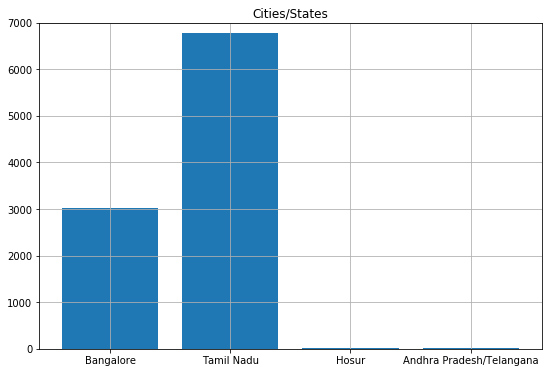

In [8]:
plt.figure(figsize = (9,6))
plt.ylim(0,7000)
plt.title("Cities/States")
plt.grid(True)
plt.bar(['Bangalore','Tamil Nadu','Hosur','Andhra Pradesh/Telangana'],[city_number.count(1),city_number.count(2),city_number.count(3),city_number.count(4)])

In [9]:
c_count = 0
for i in df.location:
    if pd.isna(i):
            c_count+=1
#print("Count : ",c_count)


def new_title():
    new_title_id = []
    i = 0
    for name in df.title:
        if name in ['Garbage', 'Garbage Dumping In Vacant Lot/Land', 'Implementation Of Waste Segregation/Garbage', 'Clearance Of Garbage Dump Or Black Spot', 'Clearing Of Roadside Dustbin', 'Collection Of Door-to-door Garbage', 'BPAC – Black Spot']:
            new_title_id.insert(i, 'Waste/Garbage')
        elif name in ['Air Pollution']:
            new_title_id.insert(i, 'Air')
        elif name in ['Maintenance/Repair Of Streetlights', 'Dangling Or Hanging Of OFCs/Cables/Wires', 'Removal Of Illegal Posters And Hoardings']:
            new_title_id.insert(i, 'Streetlights')
        elif name in ['Regular Supply Of Electricity']:
            new_title_id.insert(i, 'Electricity')
        elif name in ['Maintenance And Repair Of Manholes', 'Fixing/Reparing Potholes']:
            new_title_id.insert(i, 'Potholes')
        elif name in ['Traffic Jams/Congestion Or Bottlenecks','Wrong Parking', 'Wrong parking', 'Parking On Footpath']:
            new_title_id.insert(i, 'Traffic/Parking')
        elif name in ['Provide Sewage lines', 'Maintenance And Repair Of Sewage Lines']:
            new_title_id.insert(i, 'Sewage')
        elif name in ['Stop Water Leakage', 'Flooding/Waterlogging Of Roads And Footpaths','Maintenance Of Lake Surrounding']:
            new_title_id.insert(i, 'Water')
        elif name in ['Single Use plastic generator']:
            new_title_id.insert(i, 'Plastic')
        else:
            new_title_id.insert(i, 'Other')
        i = i+1
    df['new_title_id'] = new_title_id
new_title()
#df.count()

{6: 6129, 1: 333, 2: 1178, 5: 662, 7: 1548, 4: 193, 9: 680}


([<matplotlib.patches.Wedge at 0x212ec9fa248>,
 [Text(-0.24526668961402678, 1.0723079086558007, '6'),
  Text(-0.9393368107506592, -0.5724040146337028, '1'),
  Text(-0.6035870969350359, -0.9196100349678312, '2'),
  Text(-0.045910922685439975, -1.0990414856492778, '5'),
  Text(0.6262984879178949, -0.9042954185617433, '7'),
  Text(0.9880903022759902, -0.4834020630367052, '4'),
  Text(1.078242385745051, -0.21770015522001965, '9')],
 [Text(-0.13378183069856003, 0.584895222903164, '57.16'),
  Text(-0.5123655331367232, -0.3122203716183833, '3.11'),
  Text(-0.32922932560092866, -0.5016054736188169, '10.99'),
  Text(-0.02504232146478544, -0.599477173990515, '6.17'),
  Text(0.34161735704612445, -0.49325204648822357, '14.44'),
  Text(0.5389583466959945, -0.26367385256547554, '1.80'),
  Text(0.5881322104063914, -0.11874553921091979, '6.34')])

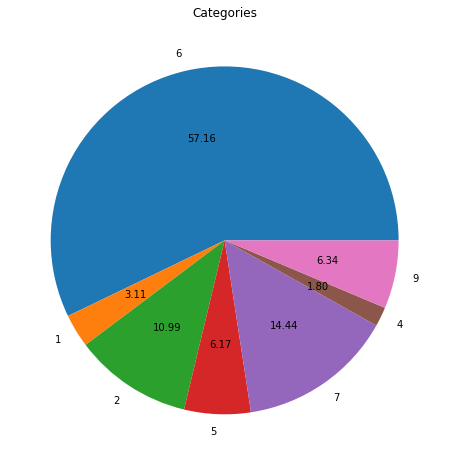

In [10]:
cat = {}
for i in df.category.unique():
    cat[i] = 0

for i in df.category:
    cat[i] +=1

print(cat)
plt.figure(figsize = (8,8))
plt.title("Categories")
plt.pie(cat.values(),labels = cat.keys(),autopct = '%.2f')

{'Waste/Garbage': 5869, 'Air': 333, 'Streetlights': 812, 'Traffic/Parking': 662, 'Sewage': 451, 'Potholes': 1257, 'Electricity': 4, 'Water': 1077, 'Plastic': 258}


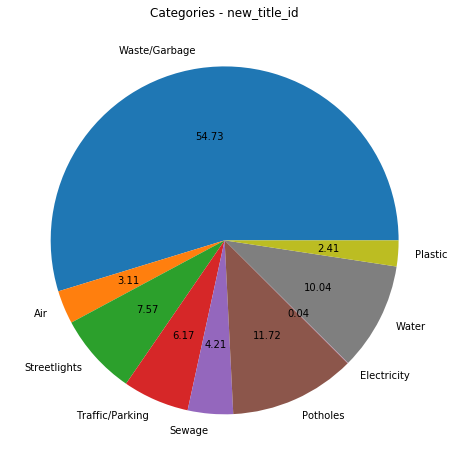

In [11]:
def bar_new_cat():
    new_cat = {}
    for i in df.new_title_id:
        if i not in new_cat:
            new_cat[i] = 1
        else:
            new_cat[i]+=1
    plt.figure(figsize = (8,8))
    plt.title("Categories - new_title_id")
    #plt.grid(True)
    print(new_cat)
    plt.pie(new_cat.values(),labels = new_cat.keys(),  autopct = '%.2f')# color = ['green','red'], tick_label = df.new_title_id.unique())

bar_new_cat()

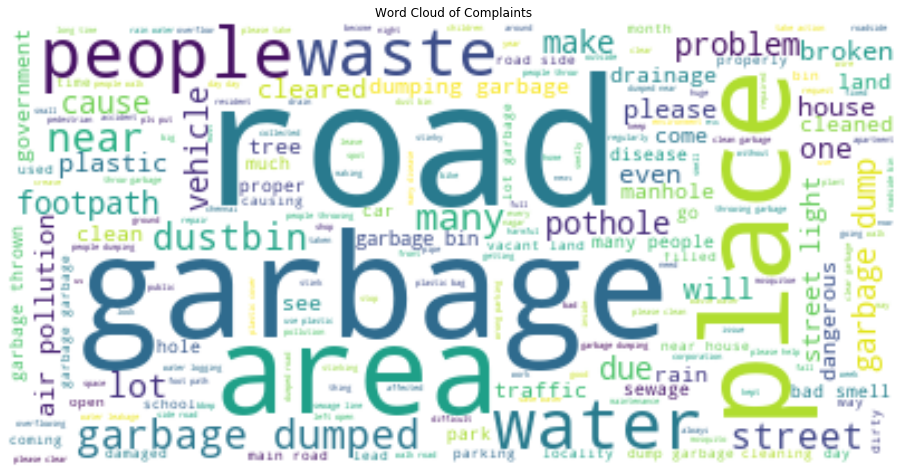

In [12]:
def word_cloud(df):
    df['description'] = df['description'].str.lower()
    des = df.description.str.split(' ')
    #des.head()
    des_cleaned = []

    #removing punctuation
    for text in des:
        text = [x.strip(string.punctuation) for x in text]
        des_cleaned.append(text)

    #des_cleaned[0]

    #joining all the text
    text_des = [" ".join(text) for text in des_cleaned]
    fin_text = " ".join(text_des)
    #final_text_spam[:500]
    wordcloud_spam = WordCloud(background_color="white").generate(fin_text)

    # Lines 2 - 5
    plt.figure(figsize = (16,16))
    plt.title("Word Cloud of Complaints")
    plt.imshow(wordcloud_spam, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
word_cloud(df)

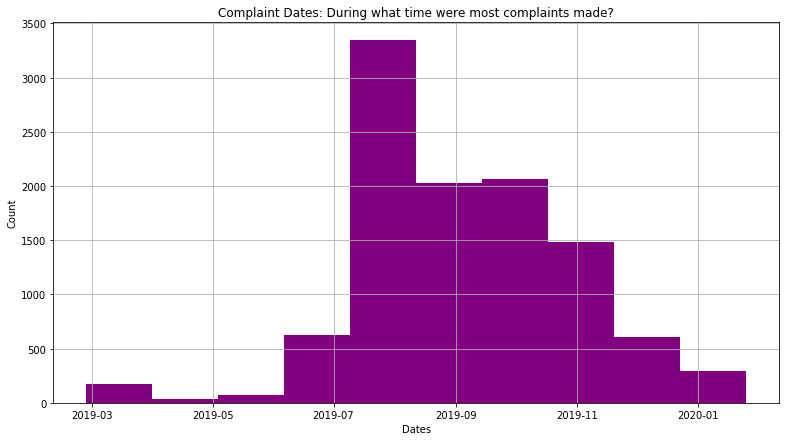

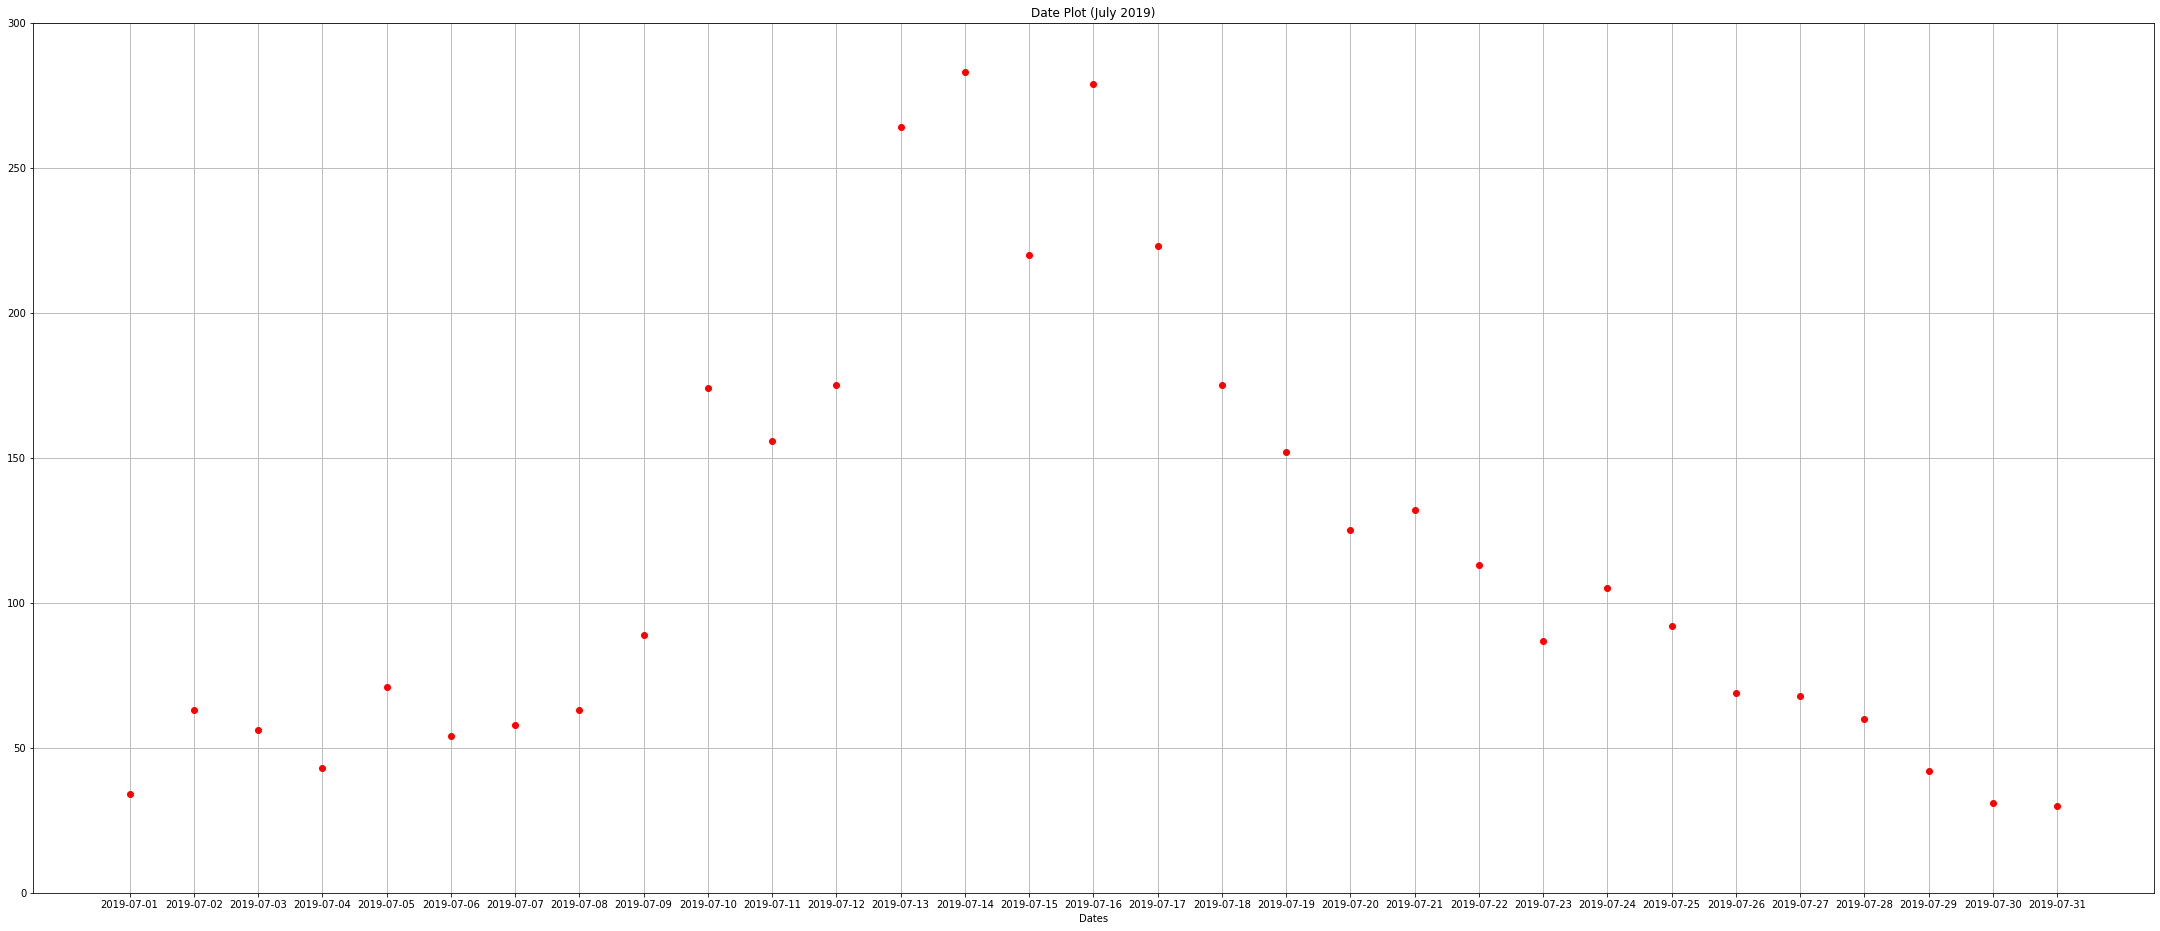

In [13]:
def date_plot():
    df.createdAt = pd.to_datetime(df['createdAt'])
    plt.figure(figsize=(13,7))
    plt.title("Complaint Dates: During what time were most complaints made?")
    plt.xlabel('Dates')
    plt.grid(True)
    plt.ylabel('Count')
    plt.hist(df.createdAt,color='purple')

def date_plot_july():
    dates = []
    for i in df.createdAt:
        d1 = str(i).split(' ')
        d = d1[0].split('-')
        if d[1] == '07':
            dates.append(d1[0])
    date = {}
    for i in dates:
        if i not in date:
            date[i] = 1
        else:
            date[i]+=1
    #print(date['2019-10-02'])
    plt.figure(figsize = (38,16))
    plt.title("Date Plot (July 2019)")
    plt.xlabel("Dates")
    plt.grid(True)
    plt.ylim(0,300)
    plt.plot_date(date.keys(),date.values(),color = 'red')
#plt.hist(dates)

date_plot()
date_plot_july()

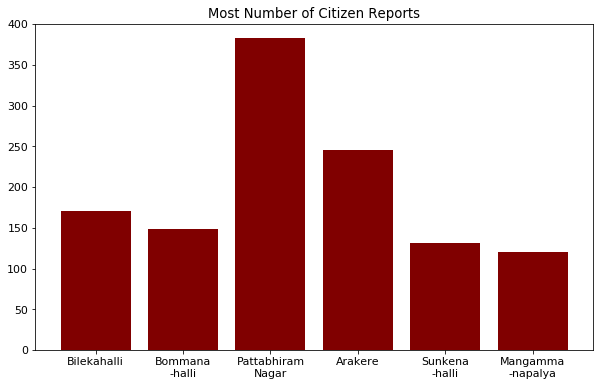

In [14]:
def wardvcomp():
    df_b = df[df['city_number'] ==1]
    #print(len(df_b.id))
    ward_complaints = {}
    ward_complaints = Counter(df_b.ward_id)

    plt.rcParams['font.size'] = 11.0
    plt.rcParams['font.weight'] = 550
    plt.figure(figsize = (10, 6))
    plt.title("Most Number of Citizen Reports")
    plt.ylim(0,400)
    plt.grid(False)
    plt.bar(['Bilekahalli','Bommana\n-halli','Pattabhiram\nNagar', 'Arakere', 'Sunkena\n-halli', 'Mangamma\n-napalya'],[ward_complaints[188], ward_complaints[175], ward_complaints[168], ward_complaints[193], ward_complaints[142], ward_complaints[190]],color = 'maroon')
wardvcomp()

Status ID Key
0: Complaint Submitted
1: Complaint Opened
2: On the Job
3: Resolved 
9: Complaint Reopened 
10: Dormant



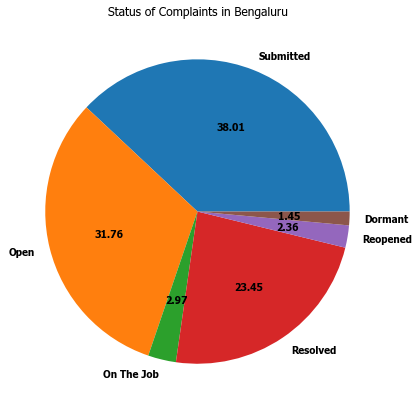

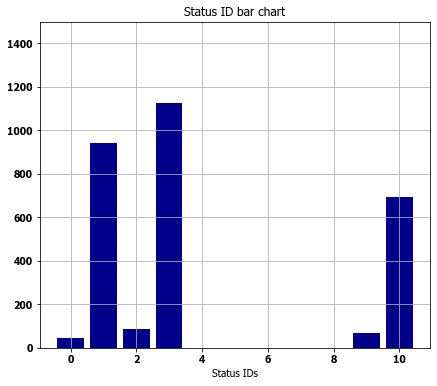

In [15]:
stat = {}
status = {'Submitted': 0, 'Open': 0, 'On The Job': 0, 'Resolved': 0, 'Reopened': 0, 'Dormant': 0}
df_b = df[df['city_number']==1]
def stat_id_pie():
    #i changed it to only bangalore 
    for i in df_b.status_id:
        if i not in stat:
            stat[i] = 1
        else:
            stat[i]+=1
    #print(stat)
    plt.rcParams['font.size'] = 10.0
    plt.rcParams['font.weight'] = 600
    plt.rcParams['font.family'] = 'Tahoma'
    plt.figure(figsize = (7,7))
    plt.title("Status of Complaints in Bengaluru")
    plt.pie(stat.values(),labels = status.keys(),autopct = "%.2f")

def stat_id_bar():
    #print("The status IDs : ",stat)
    plt.figure(figsize = (7,6))
    plt.title("Status ID bar chart")
    plt.grid(True)
    plt.xlabel("Status IDs")
    plt.ylim(0,1500)
    plt.bar(stat.keys(), height=stat.values(), color = 'darkblue')
    
print("Status ID Key\n0: Complaint Submitted\n1: Complaint Opened\n2: On the Job\n3: Resolved \n9: Complaint Reopened \n10: Dormant\n")
stat_id_pie()
stat_id_bar()


{'Waste/Garbage': 1395}


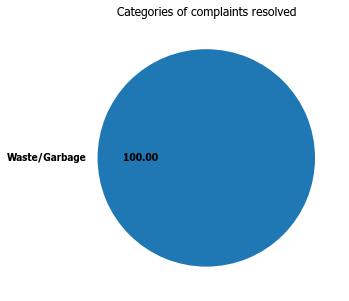

In [16]:
def stat_resolved():
    df1 = df[['new_title_id','status_id']]
    #print(df1)
    #for i in df1.categor
    cat = list(df.new_title_id)
    stat = list(df.status_id)
    res = {}
    for i in stat:
        if i==3:
            ct = cat[stat.index(i)]
            if ct not in res:
                res[ct] = 1
            else:
                res[ct]+=1
    print(res)
    plt.figure(figsize = (5,5))
    plt.title("Categories of complaints resolved")
    plt.pie(res.values(),labels = res.keys(),autopct = '%.2f')
stat_resolved()

In [17]:
'''ig, axes = plt.subplots(figsize=(6,6))
axes.scatter(df.longitude, df.latitude, s=0.1, alpha=0.5, c='r')
plt.show()
'''
'''bangalore_map_img = 'https://lh3.googleusercontent.com/np8igtYRrHpe7rvJwMzVhbyUZC4Npgx5fRznofRoLVhP6zcdBW9tfD5bC4FbF2ITctElCtBrOn7VH_qEBZMVoPrTFipBdodufT0QU1NeeQVyokMAKtvSHS9BfYMswXodz_IrkiZStg=w500-h664-no'
bangalore_map = plt.imread(bangalore_map_img)
cmap = plt.get_cmap("jet")

axes = df.plot(figsize=(10,15), kind='scatter', 
                    x='longitude', y='latitude', 
                    alpha=0.5, marker="o", cmap=cmap,
                    colorbar=False)

epsilon = 0.01
bound_box = [min(df.longitude) + epsilon, max(df.longitude) + epsilon, 
             min(df.latitude) + epsilon, max(df.latitude) + epsilon]
im = plt.imshow(bangalore_map, extent=bound_box, zorder=0, 
           cmap=cmap, interpolation='nearest', alpha=0.7)

axes.set_ylabel("Latitude")
axes.set_xlabel("Longitude")
axes.set_title('Accident Heatmap of city of Bangalore')
# Colorbar
speed = train_data["speed"].values
tick_values = np.linspace(speed.min(), speed.max(), num=6, dtype=np.int64)

cbar = plt.colorbar(im, fraction=0.05, pad=0.02)
cbar.set_label("Speed (km / hour)")
cbar.ax.set_yticklabels(["%d"%(val) for val in tick_values])

plt.tight_layout()

#output_image = os.path.join(input_data_dir, "output_bangalore_map_traffic")
#plt.savefig(output_image + ".png", format='png', dpi=300)

axes.set_ylabel("Latitude")
axes.set_xlabel("Longitude")

plt.tight_layout()

plt.show()

count = 0
for i in df.latitude:
    if int(i)==0:
        count+=1
print(count)
df_dict = df.to_dict()
#df_dict
count = 0
for j in range(len(df['id'])):
    if int(df_dict['latitude'][j])==0 and int(df_dict['longitude'][j])==0:
        count+=1
print(count)
print(min(abs(df.latitude)))
'''

'bangalore_map_img = \'https://lh3.googleusercontent.com/np8igtYRrHpe7rvJwMzVhbyUZC4Npgx5fRznofRoLVhP6zcdBW9tfD5bC4FbF2ITctElCtBrOn7VH_qEBZMVoPrTFipBdodufT0QU1NeeQVyokMAKtvSHS9BfYMswXodz_IrkiZStg=w500-h664-no\'\nbangalore_map = plt.imread(bangalore_map_img)\ncmap = plt.get_cmap("jet")\n\naxes = df.plot(figsize=(10,15), kind=\'scatter\', \n                    x=\'longitude\', y=\'latitude\', \n                    alpha=0.5, marker="o", cmap=cmap,\n                    colorbar=False)\n\nepsilon = 0.01\nbound_box = [min(df.longitude) + epsilon, max(df.longitude) + epsilon, \n             min(df.latitude) + epsilon, max(df.latitude) + epsilon]\nim = plt.imshow(bangalore_map, extent=bound_box, zorder=0, \n           cmap=cmap, interpolation=\'nearest\', alpha=0.7)\n\naxes.set_ylabel("Latitude")\naxes.set_xlabel("Longitude")\naxes.set_title(\'Accident Heatmap of city of Bangalore\')\n# Colorbar\nspeed = train_data["speed"].values\ntick_values = np.linspace(speed.min(), speed.max(), num=6, dt

Categories
Waste/Garbage : 1695
Air : 54
Streetlights : 211
Traffic/Parking : 123
Sewage : 116
Potholes : 405
Electricity : 3
Water : 224
Plastic : 129


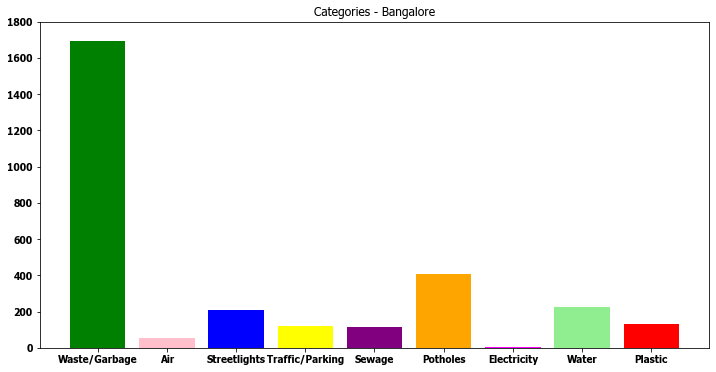

In [18]:
df_b = df[df['city_number']==1]

def cat_b():
    new_cat = {}
    for i in df_b.new_title_id:
        if i not in new_cat:
            new_cat[i] = 1
        else:
            new_cat[i]+=1
    plt.figure(figsize = (12,6))
    plt.title("Categories - Bangalore")
    #plt.grid(True)
    print("Categories")
    for i in new_cat:
        print(i,":",new_cat[i])
    plt.ylim(0,1800)
    #plt.grid(True)
    plt.bar(new_cat.keys(),new_cat.values(),color = ['green','pink','blue','yellow','purple','orange','magenta','lightgreen','red'])# color = ['green','red'], tick_label = df.new_title_id.unique())

cat_b() 

In [19]:
def ward_cleaning():
    count = 0
    noise = []
    for i in df_b.ward_id:
        if i not in list(range(1,199)):
            count+=1
            noise.append(i)
    print(count)
    loc = []
    for i in np.unique(np.array(noise)):
        loc.append((df_b.loc[df['ward_id']==i]).location)
    print(loc)
    
ward_cleaning()

1
[60    bangalore
Name: location, dtype: object]


The following cells of code depict a machine learning model that uses NLP to filter and preprocess the text data given in df.description, using df.new_title_id as the target values.
Uses NLTK, RE, SKLEARN libraries

pip install -U scikit-learn HAS to be done before running the below snippets of code

In [35]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

def preprocess():
    stemmer = PorterStemmer()
    words = stopwords.words("english")

    #the preprocessing is done in 4 steps:

    #removing punctuation
    #removing stopwords like 'the', 'this','as',etc
    #conversion of the entire text to lower case
    #Stemming: reducing the number of inflectional forms of words by reducing all to their common stem.
    #For example, 'argue','arguing','argued' are all reduced to 'argu'
    df['processedtext'] = df['description'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
    
def predict_cat():  
    #grouping data into test and train based on specific target values, in this case new_title_id
    target = df['new_title_id']

    X_train, X_test, y_train, y_test = train_test_split(df['processedtext'], target, test_size=0.15, random_state=100)

    #X_train: description data for training
    #y_train: corresponding categories for training
    #X_test and y_test: description and category for testing
    
    #Vectorizing the train and test data using TfIDf vectorization
    #TfIdf - Text Frequency Inverse Document Freqeuncy : vectorizes based on frequency across the current text document but less frequency across multiple documents

    vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7) #initializing the vector
    train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U')) #astype('U') converts the dataframe into a Unicode array
    test_tfIdf = vectorizer_tfidf.transform(X_test.values.astype('U'))#transforming the text into frequency vectors
    #print(test.tfIdf)
    #print(vectorizer_tfidf.get_feature_names()[:10])
    
    #building text classification model using Naive Bayes Classifier (most common one which is based on probability)

    nb_classifier = MultinomialNB() #classifier created
    nb_classifier.fit(train_tfIdf, y_train) #fitting the classifier onto the training data
    pred2 = nb_classifier.predict(test_tfIdf) #predictions made on the unseen data
    X_test.head(5)
    pred_val = X_test.to_frame()
    pred_val['pred_cat'] = pred2
    print(pred_val.head(20))
    
    #calculating accuracy of the model
    accuracy_tfidf = metrics.accuracy_score(y_test, pred2)
    print("\n\nAccuracy obtained : ",accuracy_tfidf*100, "%")
    
preprocess()
predict_cat()

                                 processedtext         pred_cat
6154                               drain cover    Waste/Garbage
3330             vacant place area garbag dump    Waste/Garbage
1431                      multipl dump mainten    Waste/Garbage
9374  clearanc garbag day public trash roadsid    Waste/Garbage
8554               thermocol plastic wood dump    Waste/Garbage
7830                     garbag dump next tree    Waste/Garbage
4075               garbag overflow roadsid bin    Waste/Garbage
6933                                black spot    Waste/Garbage
8027     park long time hotspot dengu mosquito    Waste/Garbage
8038                      sewag leak ling time    Waste/Garbage
2726                       marina beach garbag    Waste/Garbage
6955                         dustbin pick bbmp    Waste/Garbage
1350                          mani accid night         Potholes
5873                                bbmp clean    Waste/Garbage
9047                           wast must

In [21]:
#df1 = df[['description','processedtext']]
#df1.head(10)


In [22]:
#SENTIMENT ANALYSIS
#Used Random Forest Regression to do Sentiment Analysis and predict polarity (severity) of the complaints. 
#Training dataset created separately in train_data.ipynb. 
#To get polarity for training dataset, TextBlob is used and the resulting polarity was customized by us (why?). 
#This polarity and corresponding description appended to a CSV file 'trained_dataset.csv'


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error


#TRAINING THE MODEL
tr = pd.read_csv('trained_dataset.csv')
tr.count()

#preprocessing the data: cleaning, removing punctuations and stopwords,converting to lower case and stemming
stemmer = PorterStemmer()
words = stopwords.words("english")

tr['processedtext'] = tr['complaint'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

tr[['complaint','processedtext']]

#Train and test values
X_train = tr['processedtext']
y_train = np.array(tr['polarity'],dtype = object)

#Vectorizing the train and test data using TfIDf vectorization
#TfIdf - Text Frequency Inverse Document Freqeuncy : vectorizes based on frequency across the current text document but less frequency across multiple documents

vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7) #initializing the vector
train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U')) #astype('U') converts the dataframe into a Unicode array

#predicting polarity of X_test using Random Forest Regression

RandForReg = RandomForestRegressor()
RandForReg.fit(train_tfIdf.toarray(),y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
#TESTING THE MODEL

X_test = df['processedtext']
test_tfIdf = vectorizer_tfidf.transform(X_test.values.astype('U'))#transforming the text into frequency vectors
pred = RandForReg.predict(test_tfIdf)
pred_val = X_test.to_frame()
pred_val['polarity'] = pred
df['polarity'] = pred
print(pred_val.head(20))

                                        processedtext      polarity
0                                 garbag behind templ  0.000000e+00
1                                          air pollut -6.016234e-08
2                                   air pollut hebbal -6.016234e-08
3                                 garbag dump near be -7.925556e-01
4   leaf garbag burn shakthi ganapathi templ premi... -2.732692e-01
5   lot garbag dump around area lot small petti sh... -4.228912e-01
6                 replac broken streetlight complaint -5.506667e-01
7   red matiz park footpath month action polic des... -5.289454e-01
8   car use footpath park space everyday year plac... -3.144812e-01
9     congest everyday time due improp road construct -3.040194e-01
10  congestiom everyday time due improp road const... -3.013736e-01
11               congest due construct small mud road -4.268944e-01
12                                        garbag dump  0.000000e+00
13      traffic jam time due construct small mud

In [24]:
k = 0
count  = 0
#print(pred_val.polarity)
for i in pred_val.polarity:
    if i == 0 :
        df.polarity[k] = -0.1
    elif i>0:
        df.polarity[k] = 0.0
    k += 1
df[['description','polarity']].head(100)

,description,polarity
0,garbage behind the temple,-1.000000e-01
1,air pollution,-6.016234e-08
2,air pollution in hebbal,-6.016234e-08
3,garbage is dumped near bes,-7.925556e-01
4,leaf and garbage burning on shakthi ganapathi ...,-2.732692e-01
...,...,...
95,garbage dumped on both sides of the road,-1.000000e-01
96,garbage dumped in vacant site,-5.558337e-02
97,uneven pothole across the road.. scooters skid...,-3.980333e-01
98,garbage truck filled with garbage parked with ...,-1.340000e-01


In [33]:
cat_prob = {'Waste/Garbage':0.5473,'Air':0.0311,'Water':0.1004,'Plastic':0.0241,'Electricity':0.0004,'Potholes':0.1172,'Sewage':0.0421,'Traffic/Parking':0.0617,'Streetlights':0.0757}
stat_prob = {1:0.60646,10:0.2270,3:0.1301,0:0.0221,9:0.0078,2:0.0084}

cat_scores = {'Waste/Garbage':1,'Air':1,'Water':1,'Plastic':0.2,'Electricity':0.6,'Potholes':1,'Sewage':0.6,'Traffic/Parking':0.4,'Streetlights':0.4}
stat_scores = {1:0.6,10:0.8,3:0.2,0:0.8,9:0.6,2:0.5}

def cal_score():
    score = []
    k = 0
    for i in df.polarity:
        cat = df.new_title_id[k]
        stat = df.status_id[k]

        ci = cat_prob[cat]*cat_scores[cat]
        si = stat_prob[stat]*stat_scores[stat]
        
        score.append(pow(ci/4 + 3 * si/4,i))
        k+=1
    
    df['score'] = score

cal_score()

In [39]:
df[['description','score']].head(20)

df_b = df[df['city_number']==1]

In [40]:
print("Max : ",max(df_b.score),"\nMin : ",min(df_b.score))

Max :  1167.5977812537424 
Min :  1.0


In [41]:
k = 0
count = 0
for i in df_b.ward_id:
    if i==0.0:
        try:
            count+=1
        except:
            pass
    k+=1
print(count)

1


In [42]:
from collections import OrderedDict 

def cal_rank(df_b,name):
    df_w = df_b[['ward_id','score']]
    df_w.head(30)

    index=list(df_w.index)
    #print(len(index))

    ward_score = {}
    for i in range(199):
        ward_score[i] = 0.0

    for i in index:
        id = df_w.ward_id[i]
        score = df_w.score[i]
        ward_score[id] += score

    ward_score[84]+=ward_score[0]
    ward_score.pop(0)
    #print(ward_score[188])
    #print(ward_score)

    wards = pd.read_csv("ward_details.csv")
    wards.head(20)

    for i in ward_score:
        ward_score[i] = [wards.loc[i-1,'Ward_Name'],ward_score[i]]

    #print(ward_score)
    #print(ward_score)

    ward_rank = sorted(ward_score.items(), key=lambda x: x[1][1],reverse = True)
    #print(ward_rank)

    file = name
    with open(file, 'w+' ,newline = '') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(['Ward_ID', 'Ward_Name','Score']) 
        for i in ward_rank:
            csvwriter.writerow([i[0],i[1][0],i[1][1]])
        
cal_rank(df_b,'ward_ranks.csv')
print("Lowest Ranked Wards - 2019")
rank = pd.read_csv("ward_ranks.csv")

rank.head(20)

Lowest Ranked Wards - 2019


,Ward_ID,Ward_Name,Score
0,188,Bilekahalli,3886.860036
1,168,Pattabhiram Nagar,872.782730
2,175,Bommanahalli,442.955053
3,193,Arakere,378.923546
4,190,Mangammanapalya,334.197224
5,84,Hagadooru,293.715157
6,142,Sunkenahalli,224.185327
7,6,Thanisandra,221.591305
8,80,Hoysala Nagar,216.987350
9,65,Kadumalleshwara,212.730900


In [43]:
def cat_score(df1,ci):
    score = []
    index=list(df1.index)
    k=0
    for i in df1.polarity:
        stat = df1.status_id[index[k]]
        si = stat_prob[stat]*stat_scores[stat]
        #if df1.ward_id[index[k]]==188:
            #print(i)
        score.append(pow(ci*si,i))
        k+=1
    #print(len(df1.id),len(score))
    df1['score'] = score

water = df_b[df_b['new_title_id']=='Water']
traffic = df_b[df_b['new_title_id']=='Traffic/Parking']
streetlights = df_b[df_b['new_title_id']=='Streetlights']
sewage = df_b[df_b['new_title_id']=='Sewage']

cat_score(water,1)
cat_score(traffic,0.4)
cat_score(streetlights,0.4)
cat_score(sewage,0.6)

In [46]:
water.head(20)

cal_rank(water,'wardranks_water.csv')
cal_rank(traffic,'wardranks_traffic.csv')
cal_rank(streetlights,'wardranks_stlights.csv')
cal_rank(sewage,'wardranks_sewage.csv')

print("Lowest Ranked Wards - Water")
rank = pd.read_csv("wardranks_water.csv")

rank.head(20)

Lowest Ranked Wards - Water


,Ward_ID,Ward_Name,Score
0,188,Bilekahalli,102012.161460
1,190,Mangammanapalya,123.802637
2,152,Sudduguntepalya,47.712413
3,168,Pattabhiram Nagar,43.236015
4,193,Arakere,34.752085
5,194,Gottigere,27.324073
6,6,Thanisandra,24.249290
7,149,Varthur,23.466697
8,175,Bommanahalli,21.980632
9,111,Shanthala Nagar,21.897997


In [47]:
print("Lowest Ranked Wards - Traffic")
rank = pd.read_csv("wardranks_traffic.csv")

rank.head(20)

Lowest Ranked Wards - Traffic


,Ward_ID,Ward_Name,Score
0,80,Hoysala Nagar,964.598365
1,175,Bommanahalli,748.504574
2,84,Hagadooru,713.314866
3,165,Ganeshmandira Ward,700.107678
4,6,Thanisandra,535.271408
5,135,Padarayanapura,534.188034
6,161,Hosakerehalli,534.188034
7,168,Pattabhiram Nagar,354.495249
8,196,Anjanapur,335.969152
9,82,Garudacharpalya,204.961356


In [48]:
print("Lowest Ranked Wards - Streetlights")
rank = pd.read_csv("wardranks_stlights.csv")

rank.head(20)

Lowest Ranked Wards - Streetlights


,Ward_ID,Ward_Name,Score
0,168,Pattabhiram Nagar,371.079021
1,188,Bilekahalli,261.462572
2,161,Hosakerehalli,173.549591
3,85,Doddanekkundi,146.481913
4,178,Sarakki,145.913107
5,83,Kadugudi,106.176686
6,175,Bommanahalli,101.133236
7,142,Sunkenahalli,89.684653
8,177,J.P.Nagar,87.871599
9,193,Arakere,81.539389


In [49]:
print("Lowest Ranked Wards - Sewage")
rank = pd.read_csv("wardranks_sewage.csv")

rank.head(20)

Lowest Ranked Wards - Sewage


,Ward_ID,Ward_Name,Score
0,193,Arakere,29.854249
1,190,Mangammanapalya,20.828175
2,192,Begur,14.504945
3,168,Pattabhiram Nagar,13.864911
4,83,Kadugudi,11.178554
5,194,Gottigere,10.557002
6,178,Sarakki,10.382127
7,174,HSR Layout,9.621136
8,160,Rajarajeshwari Nagar,9.084799
9,150,Bellandur,8.875923
